In [14]:
import pandas as pd
import seaborn as sns

from scipy.stats import yeojohnson
from statsmodels.multivariate.manova import MANOVA

In [15]:
def read_excel_multisheet(filename: str) -> pd.DataFrame:
    workbook = pd.ExcelFile(filename)
    sheets = workbook.sheet_names
    df = pd.concat([pd.read_excel(workbook, sheet_name=s, index_col="Unnamed: 0").sort_index()
                    .assign(source=s) for s in sheets])
    return df

In [16]:
syntaxcomp_metrics_spacy = read_excel_multisheet("../data/syntaxcomp_metrics_spacy.xlsx")

In [17]:
syntaxcomp_metrics_spacy

,distractor_set_id,distractor_id,distractor_text,distractor_parse,Number of Sentences,Number of Words,Number of Clauses,Number of T-Units,Mean Sentence Length,Mean Clause Length,...,advcl_ratio,advcl:relcl_ratio,ccomp_ratio,csubj_ratio,csubj:outer_ratio,nsubj:outer_ratio,parataxis_ratio,xcomp_ratio,conj_ratio,source
0,0,0,Автор очень любил свою родину.,# sent_id = 1\n# text = Автор очень любил свою...,1.0,5.0,1.0,1.0,5.0,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,BartDG
1,0,1,Автор часто играл на скрипке на своей родине.,# sent_id = 1\n# text = Автор часто играл на с...,1.0,8.0,1.0,1.0,8.0,8.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,BartDG
2,0,2,Соотечественник автора спас жизнь своему сыну ...,# sent_id = 1\n# text = Соотечественник автора...,1.0,9.0,1.0,1.0,9.0,9.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,BartDG
3,1,3,Оба козла были горными козлами.,# sent_id = 1\n# text = Оба козла были горными...,1.0,5.0,1.0,1.0,5.0,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,BartDG
4,1,4,"Старая коза, маленькая, была готова снова прыг...","# sent_id = 1\n# text = Старая коза, маленькая...",1.0,7.0,2.0,1.0,7.0,3.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,BartDG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,53,161,Героине повествования медсёстры не разрешали в...,# sent_id = 1\n# text = Героине повествования ...,1.0,18.0,3.0,2.0,18.0,6.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,true_distractors
162,53,162,Муж выздоровел благодаря заботам жены.,# sent_id = 1\n# text = Муж выздоровел благода...,1.0,5.0,1.0,1.0,5.0,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,true_distractors
163,54,163,"Пётр решил, выбравшись из западни, двигаться в...","# sent_id = 1\n# text = Пётр решил, выбравшись...",1.0,22.0,5.0,2.0,22.0,4.40,...,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.200000,true_distractors
164,54,164,Шведский король мечтал о реванше за поражение ...,# sent_id = 1\n# text = Шведский король мечтал...,1.0,20.0,3.0,2.0,20.0,6.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,true_distractors


In [18]:
syntaxcomp_metrics_spacy.columns

Index(['distractor_set_id', 'distractor_id', 'distractor_text',
       'distractor_parse', 'Number of Sentences', 'Number of Words',
       'Number of Clauses', 'Number of T-Units', 'Mean Sentence Length',
       'Mean Clause Length', 'Mean T-Unit Length',
       'Mean Number of Clauses per Sentence',
       'Mean Number of Clauses per T-Unit', 'Mean Tree Depth',
       'Median Tree Depth', 'Minimum Tree Depth', 'Maximum Tree Depth',
       'Mean Dependency Distance', 'Node-to-Terminal-Node Ratio',
       'Average Levenshtein Distance between POS',
       'Average Levenshtein Distance between deprel', 'Average NP Length',
       'Complex NP Ratio', 'Number of Combined Clauses',
       'Number of Coordinate Clauses', 'Number of Subordinate Clauses',
       'Coordinate to Combined Clause Ratio',
       'Subordinate to Combined Clause Ratio',
       'Coordinate to Subordinate Clause Ratio',
       'Coordinate Clause to Sentence Ratio',
       'Subordinate Clause to Sentence Ratio', 'ROOT_

In [19]:
syntaxcomp_metrics_spacy_ = syntaxcomp_metrics_spacy[
    [
        "source",
        'Number of Sentences', 'Number of Words',
        'Number of Clauses', 'Number of T-Units', 'Mean Sentence Length',
        'Mean Clause Length', 'Mean T-Unit Length',
        'Mean Number of Clauses per Sentence',
        'Mean Number of Clauses per T-Unit', 'Mean Tree Depth',
        'Median Tree Depth', 'Minimum Tree Depth', 'Maximum Tree Depth',
        'Mean Dependency Distance', 'Node-to-Terminal-Node Ratio',
        'Average NP Length',
        'Complex NP Ratio', 'Number of Combined Clauses',
        'Number of Coordinate Clauses', 'Number of Subordinate Clauses'
    ]
].rename(columns={
    "Number of Sentences": "num_sents",
    "Number of Words": "num_words",
    "Number of Clauses": "num_clauses",
    "Number of T-Units": "num_tunits",
    "Mean Sentence Length": "mean_sent_len",
    "Mean Clause Length": "mean_clause_len",
    "Mean T-Unit Length": "mean_tunit_len",
    "Mean Number of Clauses per Sentence": "C_S",
    "Mean Number of Clauses per T-Unit": "C_TU",
    "Mean Tree Depth": "mean_tree_depth",
    "Median Tree Depth": "med_tree_depth",
    "Minimum Tree Depth": "min_tree_depth",
    "Maximum Tree Depth": "max_tree_depth",
    "Mean Dependency Distance": "mean_dep_dist",
    "Node-to-Terminal-Node Ratio": "node_leaf_ratio",
    "Average NP Length": "avg_np_len",
    "Complex NP Ratio": "comp_np_ratio",
    "Number of Combined Clauses": "cnt_comb_clauses",
    "Number of Coordinate Clauses": "num_coord_clauses",
    "Number of Subordinate Clauses": "num_subord_clauses"
})

In [20]:
corr = syntaxcomp_metrics_spacy_.drop(["source"], axis="columns").corr()
corr

,num_sents,num_words,num_clauses,num_tunits,mean_sent_len,mean_clause_len,mean_tunit_len,C_S,C_TU,mean_tree_depth,med_tree_depth,min_tree_depth,max_tree_depth,mean_dep_dist,node_leaf_ratio,avg_np_len,comp_np_ratio,cnt_comb_clauses,num_coord_clauses,num_subord_clauses
num_sents,1.000000,0.107455,0.171841,0.392603,-0.093899,-0.068482,-0.088546,-0.051177,-0.044752,-0.103644,-0.129866,-0.171925,0.000898,-0.067862,-0.032568,0.002131,-0.021119,-0.014082,-0.009850,-0.011141
num_words,0.107455,1.000000,0.628508,0.387916,0.973055,0.309782,0.753095,0.606916,0.429523,0.718015,0.714905,0.696991,0.735284,0.444958,-0.011046,0.102575,0.070150,0.617680,0.374835,0.516672
num_clauses,0.171841,0.628508,1.000000,0.495363,0.594466,-0.474889,0.324672,0.972888,0.771366,0.539039,0.533263,0.518710,0.560533,0.186916,0.009145,-0.277716,-0.231951,0.982607,0.463539,0.886864
num_tunits,0.392603,0.387916,0.495363,1.000000,0.311825,-0.170968,-0.267304,0.412589,-0.139014,0.134751,0.124235,0.104912,0.176950,0.141264,-0.064240,-0.096857,-0.064598,0.428788,0.915796,0.037960
mean_sent_len,-0.093899,0.973055,0.594466,0.311825,1.000000,0.323644,0.774767,0.623778,0.442099,0.744015,0.744244,0.740030,0.738653,0.455781,-0.007078,0.103938,0.074775,0.621083,0.380037,0.517984
mean_clause_len,-0.068482,0.309782,-0.474889,-0.170968,0.323644,1.000000,0.437002,-0.468547,-0.432094,0.165355,0.167225,0.167058,0.159561,0.263026,0.013062,0.476737,0.343442,-0.469104,-0.155978,-0.455349
mean_tunit_len,-0.088546,0.753095,0.324672,-0.267304,0.774767,0.437002,1.000000,0.348067,0.571545,0.651147,0.651655,0.647766,0.646035,0.368669,0.033049,0.170336,0.105244,0.346233,-0.251958,0.515654
C_S,-0.051177,0.606916,0.972888,0.412589,0.623778,-0.468547,0.348067,1.000000,0.793676,0.570033,0.569323,0.566309,0.567549,0.200817,0.015760,-0.281946,-0.230801,0.997127,0.470936,0.899701
C_TU,-0.044752,0.429523,0.771366,-0.139014,0.442099,-0.432094,0.571545,0.793676,1.000000,0.511402,0.510711,0.508010,0.509313,0.106678,0.050925,-0.258243,-0.225800,0.791372,-0.131599,0.961267
mean_tree_depth,-0.103644,0.718015,0.539039,0.134751,0.744015,0.165355,0.651147,0.570033,0.511402,1.000000,0.999299,0.995829,0.992791,0.168728,0.341891,0.107570,0.057610,0.566661,0.191770,0.548405


<Axes: >

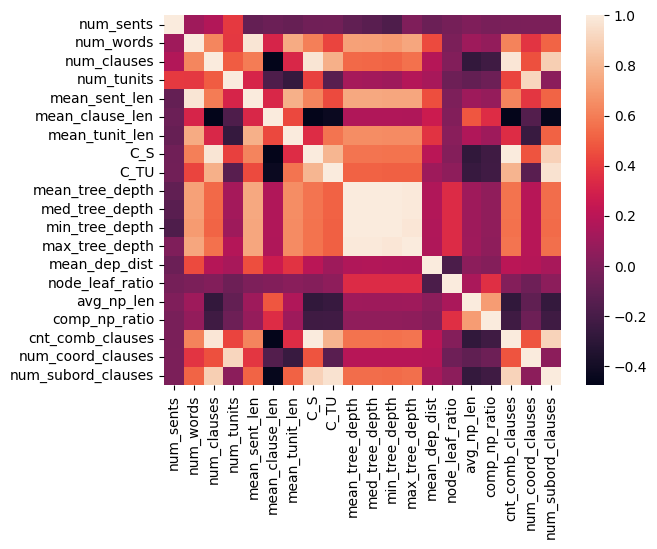

In [21]:
hm = sns.heatmap(corr)
hm

In [32]:
fit = MANOVA.from_formula(
    "num_sents+num_words+mean_clause_len+num_clauses+max_tree_depth+mean_dep_dist+node_leaf_ratio+avg_np_len+comp_np_ratio+cnt_comb_clauses+num_coord_clauses+num_subord_clauses~source",
    data=syntaxcomp_metrics_spacy_
)
manova_result = fit.mv_test(skip_intercept_test=True)
print(manova_result)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
         source         Value   Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.5213 90.0000 10387.2235 11.6365 0.0000
         Pillai's trace 0.5743 90.0000 13842.0000 10.4823 0.0000
 Hotelling-Lawley trace 0.7502 90.0000  7007.1113 12.7405 0.0000
    Roy's greatest root 0.4871 10.0000  1538.0000 74.9215 0.0000



In [31]:
help(fit.mv_test)

Help on method mv_test in module statsmodels.multivariate.manova:

mv_test(hypotheses=None, skip_intercept_test=False) method of statsmodels.multivariate.manova.MANOVA instance
        Linear hypotheses testing
    
        Parameters
        ----------
        hypotheses : list[tuple]
    Hypothesis `L*B*M = C` to be tested where B is the parameters in
    regression Y = X*B. Each element is a tuple of length 2, 3, or 4:
    
      * (name, contrast_L)
      * (name, contrast_L, transform_M)
      * (name, contrast_L, transform_M, constant_C)
    
    containing a string `name`, the contrast matrix L, the transform
    matrix M (for transforming dependent variables), and right-hand side
    constant matrix constant_C, respectively.
    
    contrast_L : 2D array or an array of strings
        Left-hand side contrast matrix for hypotheses testing.
        If 2D array, each row is an hypotheses and each column is an
        independent variable. At least 1 row
        (1 by k_exog, the 

In [36]:
manova_result["source"]["stat"]["Pr > F"].iloc[0]

6.763801968124625e-154

In [38]:
2e-1

0.2

In [26]:
len(syntaxcomp_metrics_spacy_["source"].unique())

10

In [27]:
syntaxcomp_metrics_spacy_["source"].unique()

array(['BartDG', 'BartDG_PM', 'BartDG_ANPM', 'MuSeRC_GPT3', 'MuSeRC_T5',
       'RuRace_GPT3', 'RuRace_T5', 'Deepseek', 'ChatGPT4o',
       'true_distractors'], dtype=object)

In [ ]:
# Extract results and create DataFrame
writer = pd.ExcelWriter("ManovaSyntParamsResult2.xlsx", engine="xlsxwriter")
workbook = writer.book
worksheet = workbook.add_worksheet("MANOVA")
writer.sheets['Validation'] = worksheet

row_id, col_id = 0, 0

for term, values in manova_result.results.items():
    worksheet.write(row_id, col_id, term)
    row_id += 1
    values["stat"].to_excel(
        writer, sheet_name="Validation", startrow=row_id, startcol=0, float_format="%.2f"
    )
    row_id += len(values)
    row_id += 1

writer.close()
